In [35]:
import subprocess

import requests
import polyline

import matplotlib.pyplot as plt
import contextily as ctx

In [36]:
def osrm_format(coords):
    lat, lon = coords
    return f"{lon},{lat}"

def get_route(points, url, api_key):
    points = ';'.join(map(osrm_format, points))
    params = {
        'geometries': 'polyline6',
        'overview': 'full',
    }
    
    headers = {
        'x-api-key': api_key,
    }
    
    url = f"{url}/{points}"
    response = requests.get(
        url, 
        params=params,
        headers=headers,
    )
    
    result = response.json()
    
    if (
        not ('code' in result)
        or result['code'] != 'Ok'
    ):
        print(response.url, result)
        return None, None
    
    geometry = result['routes'][0]['geometry']
    return (
        polyline.decode(geometry, 6), 
        result['routes'][0]['distance'],
    )

def plot_route(route):
    fig, ax = plt.subplots(1, 1, figsize=(12, 30))
    
    latitudes = [point[0] for point in route]
    longitudes = [point[1] for point in route]
    
    ax.plot(longitudes, latitudes, color='red', label='Route')
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    
    ax.legend()
    ax.set_yticks([])
    ax.set_xticks([])
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    
    plt.show()

In [49]:
url = subprocess.run(
    ['terraform', 'output', '-raw', 'url'], 
    cwd='../',
    capture_output=True, 
    text=True,
).stdout.strip()

api_key = subprocess.run(
    ['terraform', 'output', '-raw', 'api_key'], 
    cwd='../',
    capture_output=True, 
    text=True,
).stdout.strip()

In [50]:
print(url)

https://aiwhxz1c17.execute-api.ap-southeast-1.amazonaws.com/v1


In [53]:
start = (20.993686966853396, 105.86939936393794)
stop = (21.043666864560734, 105.83550324106861)

points = [start] + [stop]

osrm_route, distance = get_route(points, url, api_key)

https://aiwhxz1c17.execute-api.ap-southeast-1.amazonaws.com/v1/105.86939936393794,20.993686966853396;105.83550324106861,21.043666864560734?geometries=polyline6&overview=full {'message': 'Internal server error'}


In [47]:
print(distance)

7688.7


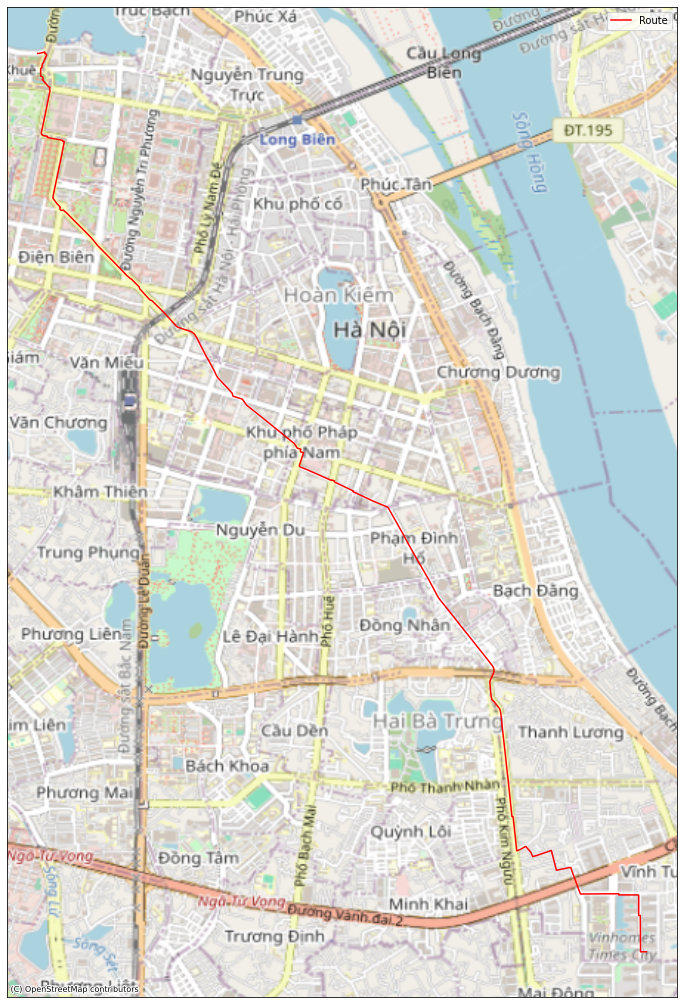

In [48]:
plot_route(osrm_route)